# Team - 4.0 Pioneers


|Roll Number | Name |
|------|------|
| 21f1001107 | Utkarsh Sahu |
| 21f3001154 | Sarthak Saran |
| 21f1002100 | Ashirbad Arun Dash |
| 21f1003267 | Abhijeet Kumar Garg |
| 21f1006777 | Kartikeya Tiwari |

In [149]:
!pip install pulp

In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

import matplotlib.pyplot as plt

import pulp

from scipy.stats import chi2_contingency

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [151]:
data_url_github = "https://raw.githubusercontent.com/utkarsh4tech/ms4001_project/refs/heads/main/supply_chain_data.csv"
data = pd.read_csv(data_url_github)
data.head(10)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
5,haircare,SKU5,1.699976,87,147,2828.348746,Non-binary,90,27,66,...,Bangalore,10,104,17,56.766476,Fail,2.779194,Road,Route A,235.461237
6,skincare,SKU6,4.078333,48,65,7823.476560,Male,11,15,58,...,Kolkata,14,314,24,1.085069,Pending,1.000911,Sea,Route A,134.369097
7,cosmetics,SKU7,42.958384,59,426,8496.103813,Female,93,17,11,...,Bangalore,22,564,1,99.466109,Fail,0.398177,Road,Route C,802.056312
8,cosmetics,SKU8,68.717597,78,150,7517.363211,Female,5,10,15,...,Mumbai,13,769,8,11.423027,Pending,2.709863,Sea,Route B,505.557134
9,skincare,SKU9,64.015733,35,980,4971.145988,Unknown,14,27,83,...,Chennai,29,963,23,47.957602,Pending,3.844614,Rail,Route B,995.929461


In [152]:
data.shape

(100, 24)

In [153]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,100.0,49.462461,31.168193,1.699976,19.597823,51.239831,77.198228,99.171329
Availability,100.0,48.400000,30.743317,1.000000,22.750000,43.500000,75.000000,100.000000
Number of products sold,100.0,460.990000,303.780074,8.000000,184.250000,392.500000,704.250000,996.000000
Revenue generated,100.0,5776.048187,2732.841744,1061.618523,2812.847151,6006.352023,8253.976921,9866.465458
Stock levels,100.0,47.770000,31.369372,0.000000,16.750000,47.500000,73.000000,100.000000
Lead times,100.0,15.960000,8.785801,1.000000,8.000000,17.000000,24.000000,30.000000
Order quantities,100.0,49.220000,26.784429,1.000000,26.000000,52.000000,71.250000,96.000000
Shipping times,100.0,5.750000,2.724283,1.000000,3.750000,6.000000,8.000000,10.000000
Shipping costs,100.0,5.548149,2.651376,1.013487,3.540248,5.320534,7.601695,9.929816
Lead time,100.0,17.080000,8.846251,1.000000,10.000000,18.000000,25.000000,30.000000


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [155]:
print("Is there any empty value:", "Yes" if data.isnull().sum().any() else "No")

Is there any empty value: No


# EDA (Exploratory Data Analysis)

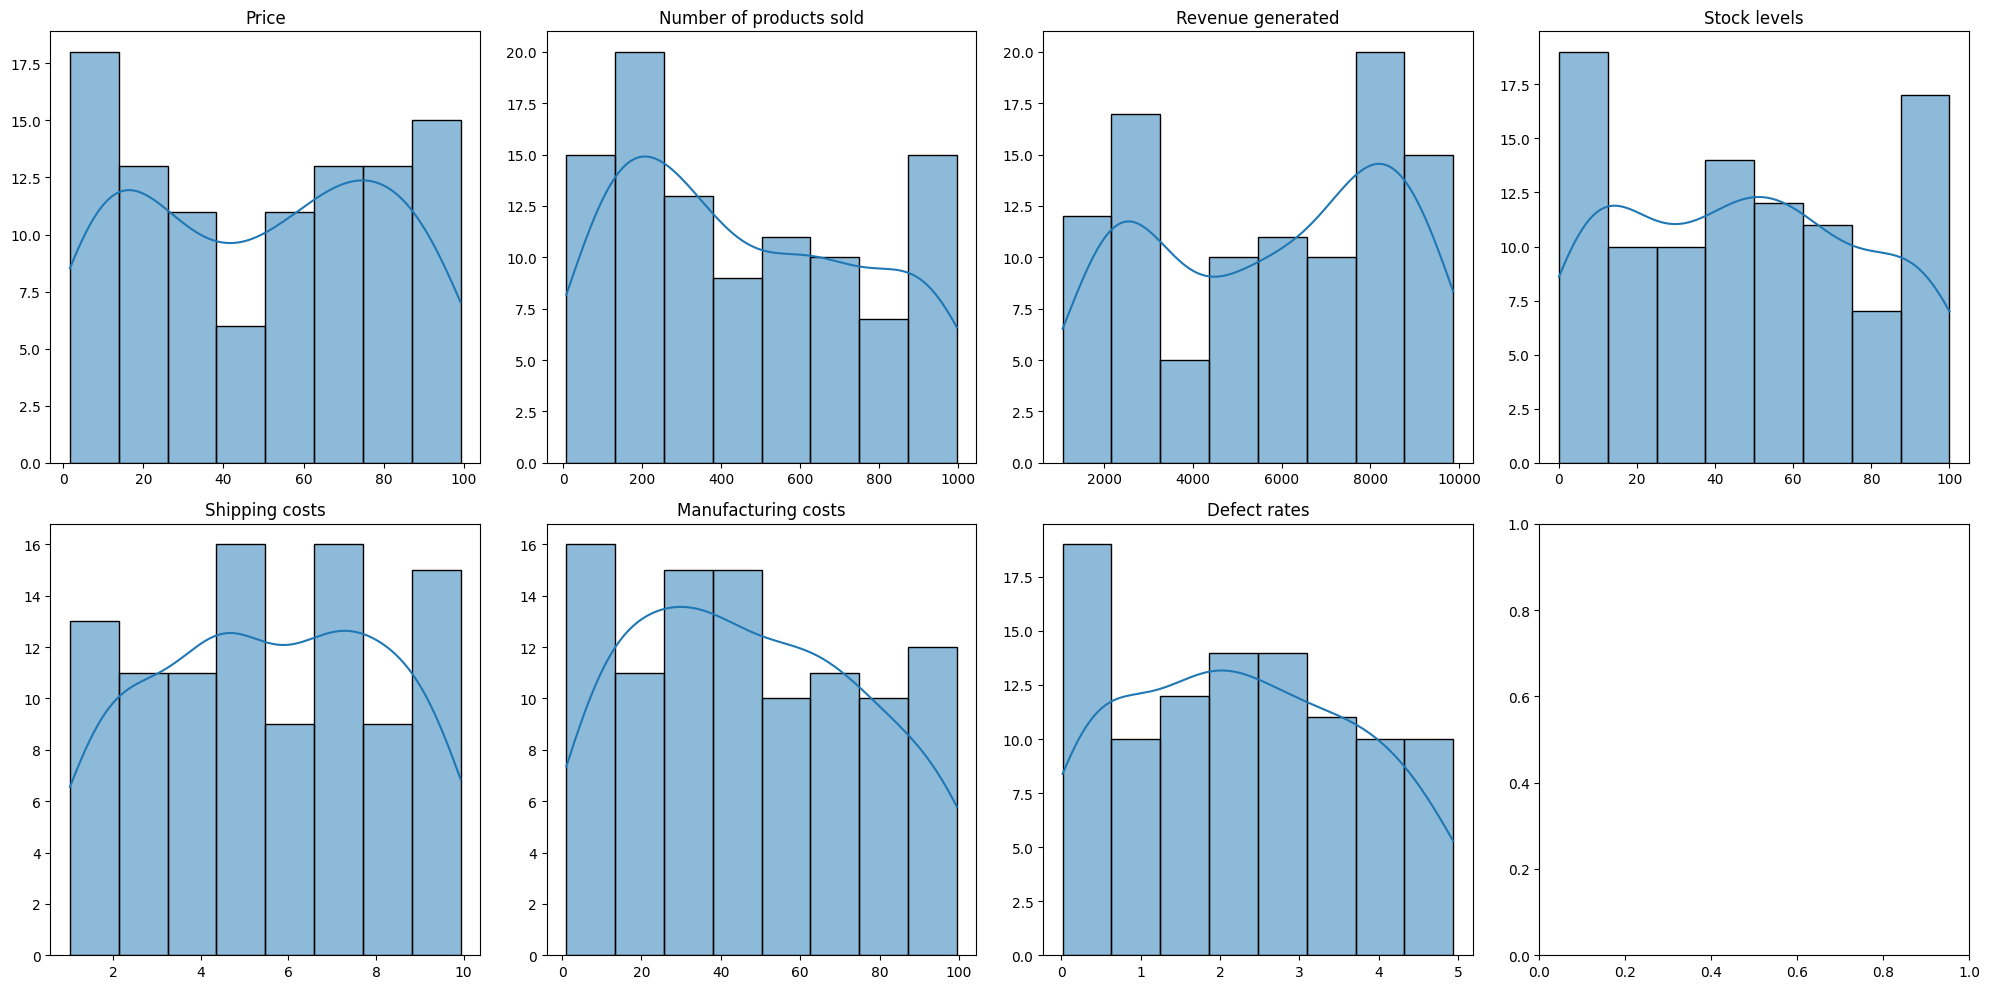

In [156]:
selected_columns = ['Price', 'Number of products sold', 'Revenue generated', 'Stock levels',
                    'Shipping costs', 'Manufacturing costs', 'Defect rates']

# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Flatten the axes array
axes = axes.flatten()

# Plotting each selected column
for i, column in enumerate(selected_columns):
    sns.histplot(data[column], ax=axes[i], kde=True)
    axes[i].set_title(column)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()


In [157]:
# Frequency distribution for categorical variables
categorical_variables = ['Product type', 'Customer demographics', 'Shipping carriers', 'Supplier name', 'Location', 'Inspection results', 'Transportation modes', 'Routes']
frequency_distribution = {}

for col in categorical_variables:
    frequency_distribution[col] = data[col].value_counts()

print("\nFrequency Distribution for Categorical Variables:")
for col, freq_dist in frequency_distribution.items():
    print(f"\n{col}:")
    print(freq_dist)
    print("-----"*10)


Frequency Distribution for Categorical Variables:

Product type:
Product type
skincare     40
haircare     34
cosmetics    26
Name: count, dtype: int64
--------------------------------------------------

Customer demographics:
Customer demographics
Unknown       31
Female        25
Non-binary    23
Male          21
Name: count, dtype: int64
--------------------------------------------------

Shipping carriers:
Shipping carriers
Carrier B    43
Carrier C    29
Carrier A    28
Name: count, dtype: int64
--------------------------------------------------

Supplier name:
Supplier name
Supplier 1    27
Supplier 2    22
Supplier 5    18
Supplier 4    18
Supplier 3    15
Name: count, dtype: int64
--------------------------------------------------

Location:
Location
Kolkata      25
Mumbai       22
Chennai      20
Bangalore    18
Delhi        15
Name: count, dtype: int64
--------------------------------------------------

Inspection results:
Inspection results
Pending    41
Fail       36
Pass 

<ipython-input-158-cc0e97f33342>:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-158-cc0e97f33342>:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-158-cc0e97f33342>:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-158-cc0e97f33342>:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-158-cc0e97f33342>:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-158-cc0e97f33342>:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

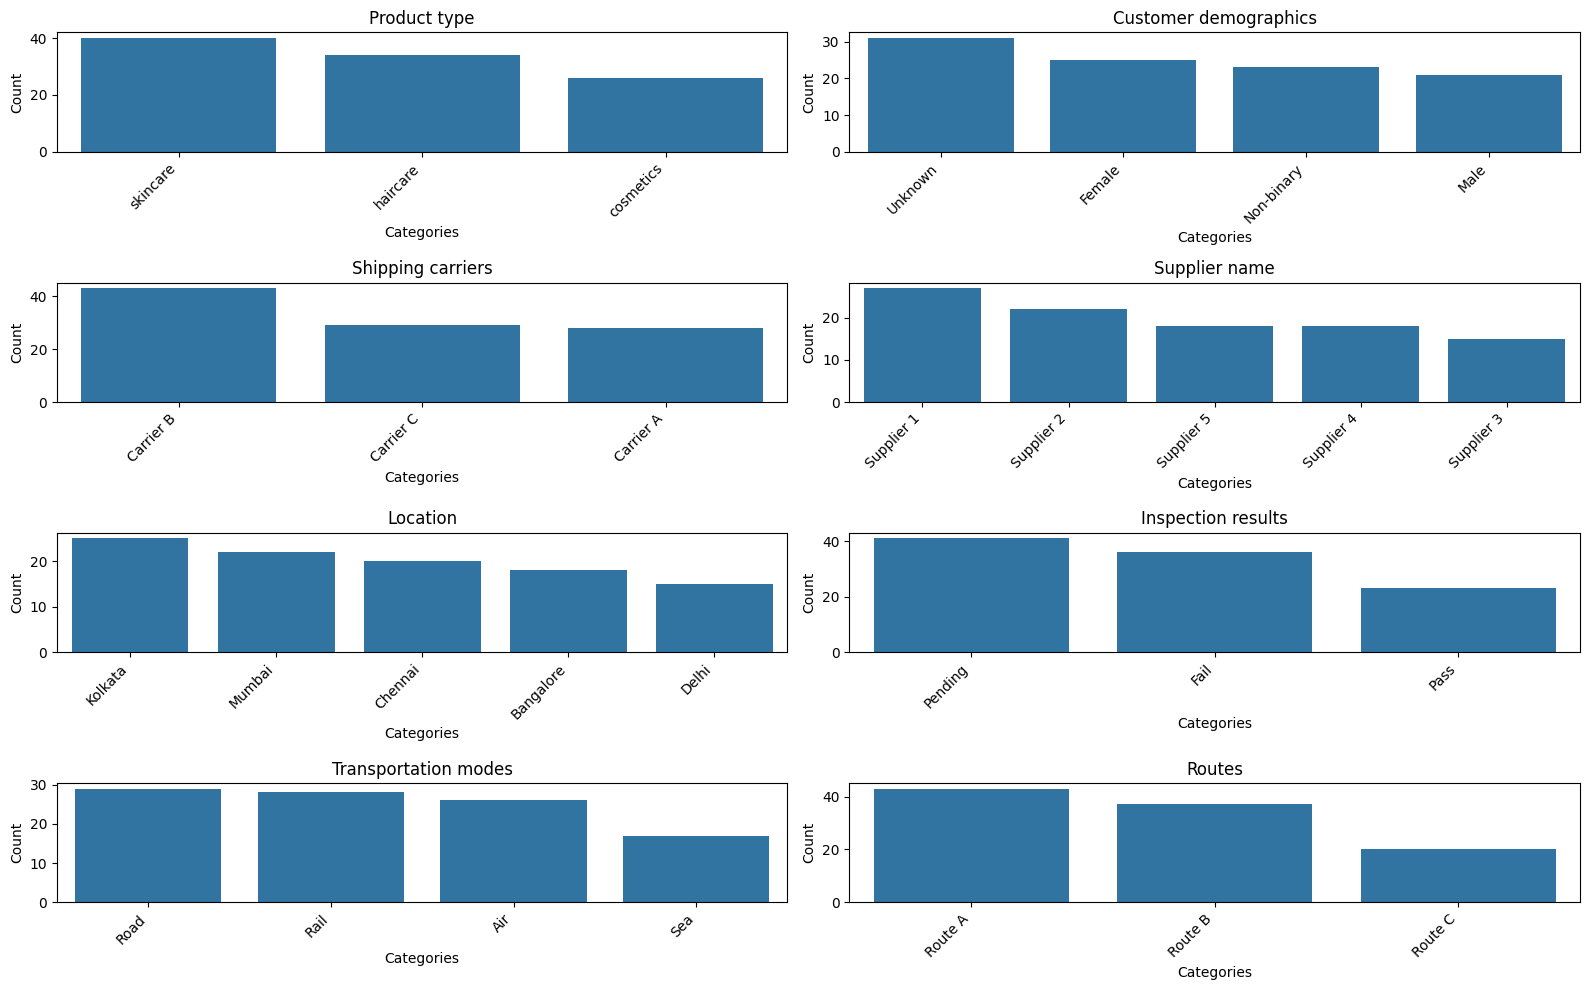

In [158]:
# Assuming categorical_variables is a list of categorical columns
num_plots = len(categorical_variables)
num_cols = 2  # Number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Number of rows in the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 10))
axes = axes.flatten()

# Plot each categorical variable distribution
for i, col in enumerate(categorical_variables):
    if col in frequency_distribution:  # Ensure key exists in frequency_distribution
        freq_dist = frequency_distribution[col]
        ax = axes[i]
        sns.barplot(x=freq_dist.index, y=freq_dist.values, ax=ax)
        ax.set_title(col)
        ax.set_xlabel("Categories")
        ax.set_ylabel("Count")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotate for readability

# Hide empty subplots if any
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

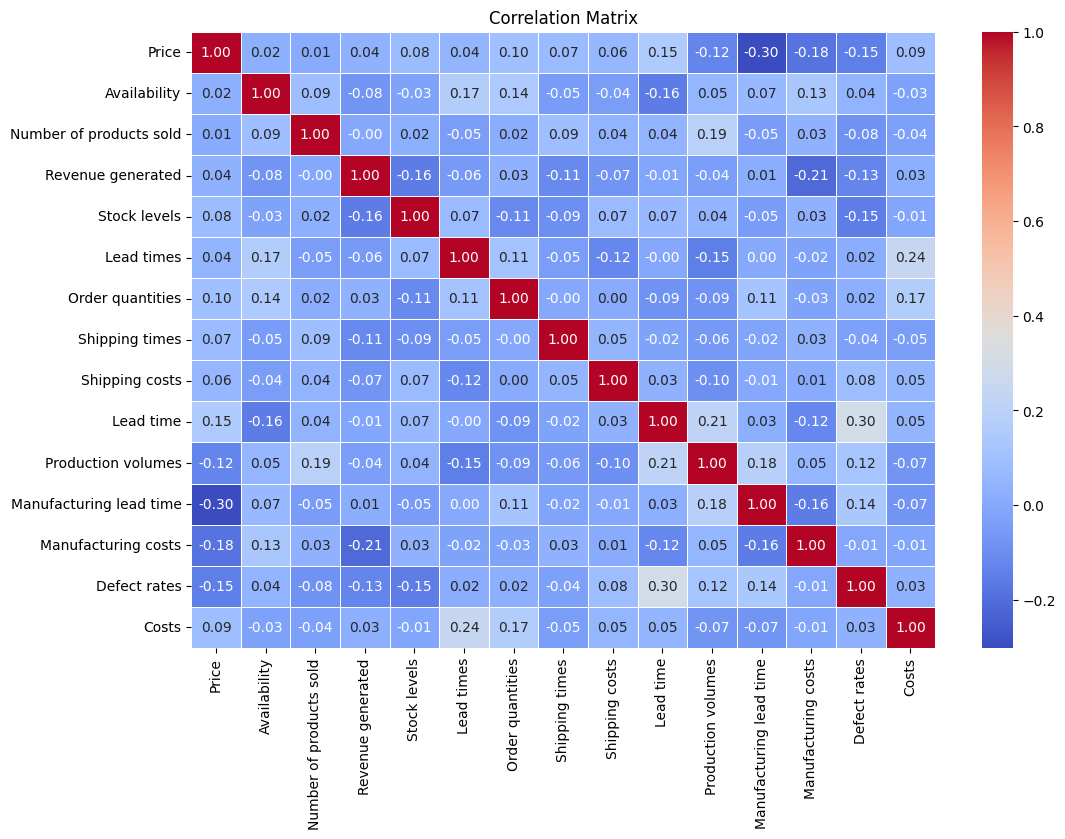

In [159]:
# Define numerical variables and compute correlation matrix
numerical_variables = ['Price', 'Availability', 'Number of products sold', 'Revenue generated', 'Stock levels', 'Lead times', 'Order quantities', 'Shipping times', 'Shipping costs', 'Lead time', 'Production volumes', 'Manufacturing lead time', 'Manufacturing costs', 'Defect rates', 'Costs']
correlation_matrix = data[numerical_variables].corr(method='pearson')

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [160]:
fig = px.scatter(data,x='Price',y='Revenue generated',
                color='Product type',
                hover_data = ['Number of products sold'],
                trendline='ols')
fig.show()

In [161]:
sales_data = data.groupby('Product type')['Number of products sold'].sum().reset_index()
sales_data

,Product type,Number of products sold
0,cosmetics,11757
1,haircare,13611
2,skincare,20731


In [162]:
pie_chart = px.pie(sales_data, values='Number of products sold', names='Product type',
                  title='Sales by Product Type',
                  hover_data=['Number of products sold'],
                  hole=0.45,
                  color_discrete_sequence=px.colors.qualitative.Pastel)
pie_chart.update_traces(textposition='inside',textinfo='percent')
pie_chart.show()

In [201]:
trans_data = data.groupby('Transportation modes')['Number of products sold'].sum().reset_index()

pie_chart = px.pie(trans_data,values='Number of products sold', names='Transportation modes',
                  title='Sales by Transportation Type',
                  hover_data=['Number of products sold'],
                  hole=0.5,
#                   color_discrete_sequence=px.colors.qualitative.Pastel
                  )
pie_chart.update_traces(textposition='inside',textinfo='percent+label')
pie_chart.show()

In [164]:
total_revenue = data.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(x=total_revenue['Shipping carriers'],
                     y=total_revenue['Revenue generated']))
fig.update_layout(title='Total revenue by shipping carrier',
                 xaxis_title='Shipping carrier',
                 yaxis_title='Revenue Generated')
fig.show()

In [165]:
total_revenue = data.groupby('Location')['Revenue generated'].sum().reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(x=total_revenue['Location'],
                    y=total_revenue['Revenue generated']))
fig.update_layout(title='Total Revenue based on location',
                 xaxis_title='Locations',
                 yaxis_title='Revenue generated')
fig.show()

In [166]:
total_revenue = data.groupby('Transportation modes')['Revenue generated'].sum().reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(x=total_revenue['Transportation modes'],
                    y=total_revenue['Revenue generated']))
fig.update_layout(title='Total Revenue based on Transportation modes',
                 xaxis_title='Transportation modes',
                 yaxis_title='Revenue generated')
fig.show()

In [167]:
avg_lead_time = data.groupby('Product type')['Lead time'].mean().reset_index()
avg_manufacturing_time = data.groupby('Product type')['Manufacturing costs'].mean().reset_index()
result = pd.merge(avg_lead_time,avg_manufacturing_time, on ='Product type')
result.rename(columns={'Lead time':'Avg lead time','Manufacturing time':'Avg manufacturing time'}, inplace=True)
result

,Product type,Avg lead time,Manufacturing costs
0,cosmetics,13.538462,43.052740
1,haircare,18.705882,48.457993
2,skincare,18.000000,48.993157


In [168]:
transportation_chart = px.pie(data,
                             values='Costs',
                             names='Transportation modes',
                             title='Cost Distribution by Transportation Mode',
                             hole=0.5,
                             color_discrete_sequence=px.colors.qualitative.Pastel)
transportation_chart.update_traces(textposition='inside',textinfo='percent+label')
transportation_chart.show()

In [169]:
defect_rate_by_product = data.groupby('Product type')['Defect rates'].mean().reset_index()

fig = px.bar(defect_rate_by_product, x='Product type', y='Defect rates',
             title='Average defect rates by product type')
fig.show()

In [170]:
trans = data.groupby('Transportation modes')['Defect rates'].mean().reset_index()

trans_chart = px.pie(trans,values='Defect rates',
                    names='Transportation modes',
                    title='Defect Rates by Transportation Mode',
                    hole=0.5,
                    color_discrete_sequence=px.colors.qualitative.Pastel)
trans_chart.update_traces(textposition='inside',textinfo='label+percent')
trans_chart.show()

# Location rankings based on 'Product selling'

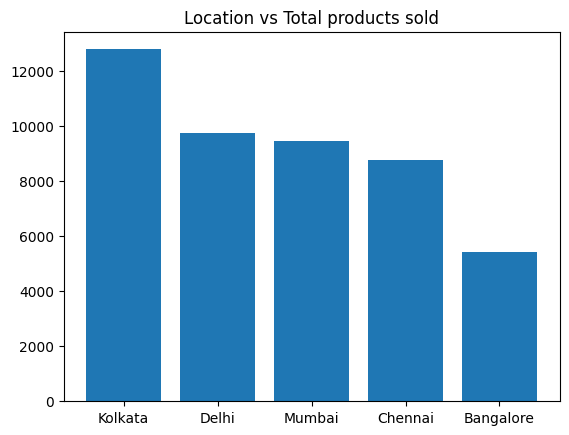

In [171]:
# Extract required fields to seperate data frame
df_loc_product_sell = data[["Location", "Number of products sold"]].copy()

#Group by location and include sum for each location groups
df_loc_product_sell=df_loc_product_sell.groupby('Location').sum()

# Rename the sum field
df_loc_product_sell.rename(columns={'Number of products sold':"SoldProducts"}, inplace=True)

# Sort the rows based on the sum of Sold products
df_loc_product_sell.sort_values(by="SoldProducts",ascending=False, inplace=True)

# Draw the bar graph
plt.bar(df_loc_product_sell.index, df_loc_product_sell['SoldProducts']);
plt.title("Location vs Total products sold");

# Average sales of each product type per location

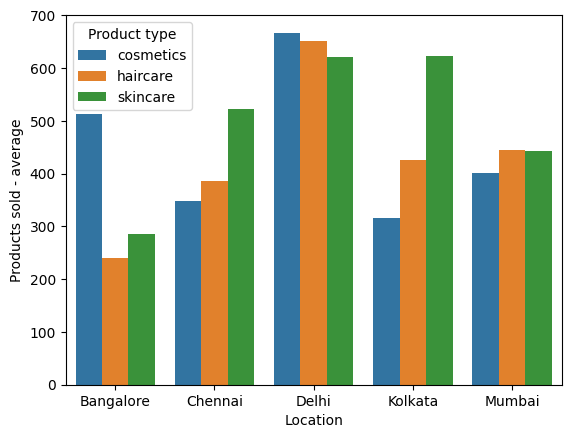

In [172]:
df_product_type_location = data[["Product type","Location", "Number of products sold"]].copy()

# Find the mean value of 'Number of Products sold'
df_product_type_location = df_product_type_location.groupby(["Location","Product type"]).mean()

# Rename the mean value column
df_product_type_location.rename({"Number of products sold":"Products sold - average"},axis = 1, inplace=True)

# Reset the index
df_product_type_location.reset_index(inplace=True)

#Draw the bar graph
sns.barplot(data=df_product_type_location,
            x="Location",
            y="Products sold - average",
            hue="Product type");# Create seperate data frame with product type, number of products sold and location

# Product types having more defect rates

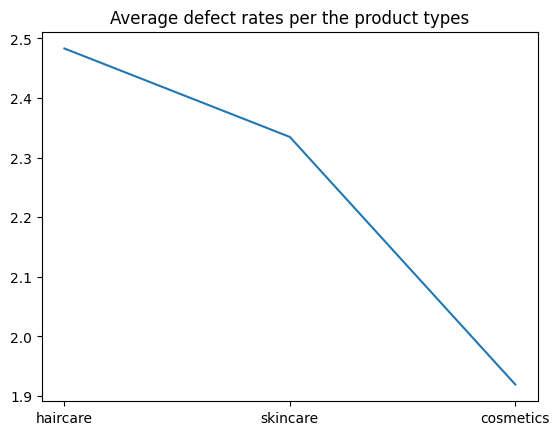

In [173]:
df_product_type_defect= data[['Product type','Defect rates']].copy()

#Group by product types
df_product_type_defect = df_product_type_defect.groupby('Product type').mean()

# Rename the Defect rates column
df_product_type_defect.rename(columns={'Defect rates':'Average defect rates'}, inplace=True)

# Sort the Average defect rates column
df_product_type_defect.sort_values(by="Average defect rates", ascending=False, inplace=True)

# Plot the line graph
plt.plot(df_product_type_defect);
plt.title("Average defect rates per the product types");

# Lead times of each product type per supplier

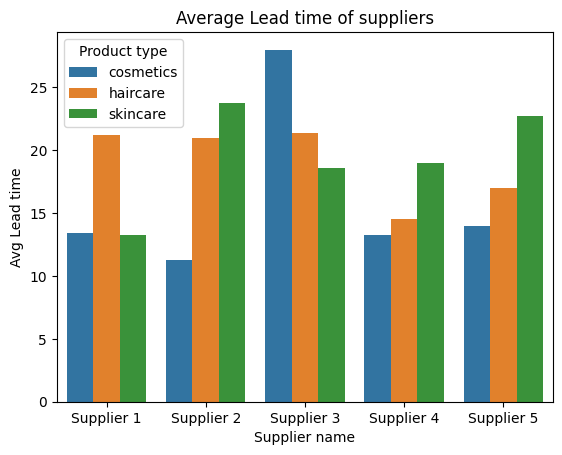

In [174]:
# Create new data frame
df_supplier_product_type = data[['Product type', 'Supplier name', 'Lead time']].copy()

# Group the columns based on the supplier name , product type and find the mean of 'lead time' of each sub group.
df_supplier_product_type = df_supplier_product_type.groupby(['Supplier name', 'Product type']).mean('Lead time')

# Rename the mean column of Lead time
df_supplier_product_type.rename(columns={'Lead time':'Avg Lead time'}, inplace=True)

#Reset the index
df_supplier_product_type.reset_index(inplace=True);

#Draw the bar graph
sns.barplot(data=df_supplier_product_type,
            x="Supplier name",
            y="Avg Lead time",
            hue="Product type"). set_title("Average Lead time of suppliers");

# Predictive Analytics for Future Planning

In [175]:
import pandas as pd
import statsmodels.api as sm

# Create the linear regression model
X = data[['Price', 'Number of products sold', 'Lead times']]
X = sm.add_constant(X)  # Add a constant term
y = data['Availability']

model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Availability   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.274
Date:                Sun, 09 Mar 2025   Prob (F-statistic):              0.288
Time:                        17:04:19   Log-Likelihood:                -482.01
No. Observations:                 100   AIC:                             972.0
Df Residuals:                      96   BIC:                             982.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Availability = 33.6812  +  0.0106 * Price + 0.0097 * Number of products sold + 0.6102 * Lead times    

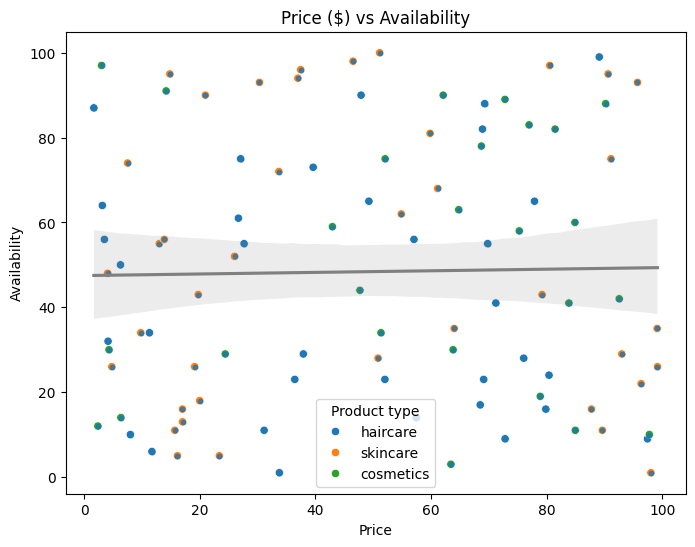

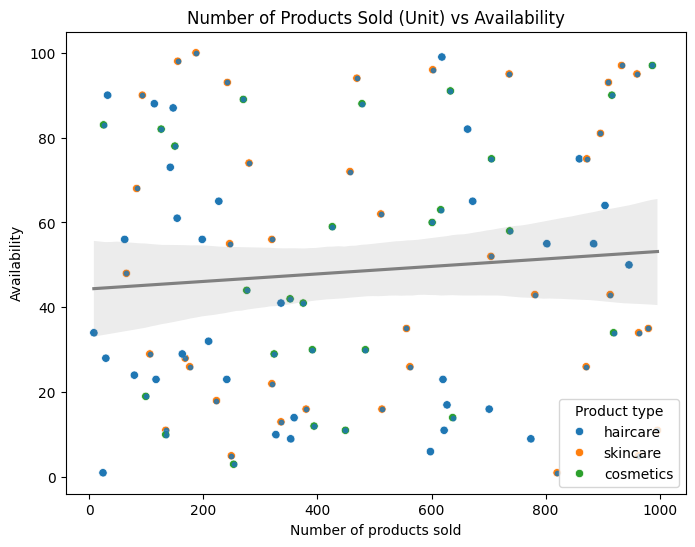

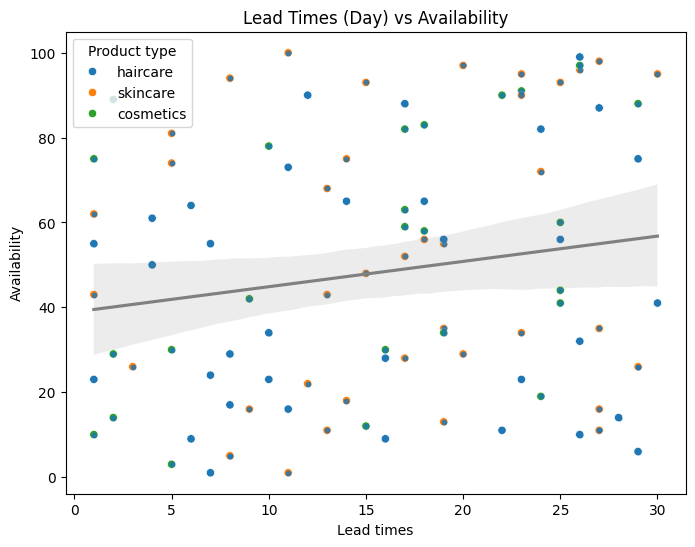

In [176]:
# Scatter plot for Price vs Availability

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='Availability', hue='Product type', data=data)
sns.regplot(x='Price', y='Availability', data=data, scatter_kws={'s': 10}, line_kws={'color': 'gray'})

plt.title('Price ($) vs Availability')
plt.show()

# Scatter plot for Number of products sold vs Availability

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Number of products sold', y='Availability', hue='Product type', data=data)
sns.regplot(x='Number of products sold', y='Availability', data=data, scatter_kws={'s': 10}, line_kws={'color': 'gray'})

plt.title('Number of Products Sold (Unit) vs Availability')
plt.show()

# Scatter plot for Lead times vs Availability

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Lead times', y='Availability', hue='Product type', data=data)
sns.regplot(x='Lead times', y='Availability', data=data, scatter_kws={'s': 10}, line_kws={'color': 'gray'})

plt.title('Lead Times (Day) vs Availability')
plt.show()

# Risk Assessment Analysis

In [225]:

risk_assessment = (
    data.groupby("Supplier name", as_index=False).agg(
        Average_Lead_Times=("Lead times", "mean"),
        SD_Lead_Times=("Lead times", "std"),
        Average_Defect_Rate=("Defect rates", "mean"),
        SD_Defect_Rate=("Defect rates", "std"),
        Pass_Rate=("Inspection results", lambda x: (x == "Pass").mean() * 100),
        Fail_Rate=("Inspection results", lambda x: (x == "Fail").mean() * 100),
        Pending_Rate=("Inspection results", lambda x: (x == "Pending").mean() * 100),
    )
)

# Visualization: Risk Assessment
fig = px.scatter(
    risk_assessment,
    x="Average_Lead_Times",
    y="Average_Defect_Rate",
    size="SD_Lead_Times",
    color="Supplier name",
    error_y="SD_Defect_Rate",
    title="Supplier Risk Assessment",
    labels={
        "Average_Lead_Times": "Average Lead Times (Day)",
        "Average_Defect_Rate": "Average Defect Rate (%)",
    },
    color_discrete_sequence=px.colors.qualitative.Set2,
)

# Customize axes to start at 0
fig.update_layout(
    xaxis=dict(range=[0, None]),
    yaxis=dict(range=[0, None]),
    template="plotly_white",
)

# Display the plot
fig.show()

# Summary of transportation modes and routes

In [226]:

mode_route_summary = (
    data.groupby(["Transportation modes", "Routes"], as_index=False)
    .agg(
        Total_Costs=("Costs", "sum"),
        Average_Costs=("Costs", "mean"),
        Count=("Costs", "size"),
    )
)

# View the summary
print(mode_route_summary)

   Transportation modes   Routes  Total_Costs  Average_Costs  Count
0                   Air  Route A  5800.887460     527.353405     11
1                   Air  Route B  4464.858025     637.836861      7
2                   Air  Route C  4338.782012     542.347752      8
3                  Rail  Route A  6790.710511     485.050751     14
4                  Rail  Route B  7007.410741     637.037340     11
5                  Rail  Route C  1370.810306     456.936769      3
6                  Road  Route A  5934.412107     539.492010     11
7                  Road  Route B  7181.085147     552.391165     13
8                  Road  Route C  2932.696386     586.539277      5
9                   Sea  Route A  2349.764416     335.680631      7
10                  Sea  Route B  3386.030113     564.338352      6
11                  Sea  Route C  1367.130992     341.782748      4


# Efficiency Analysis by Route

In [227]:
efficiency_analysis = (
    data.groupby("Routes", as_index=False)
    .agg(
        Average_Cost=("Costs", "mean"),
        Shipments=("Costs", "size"),  # Count the number of shipments
    )
)

# Calculate Efficiency Score
efficiency_analysis["Efficiency_Score"] = (
    efficiency_analysis["Shipments"] / efficiency_analysis["Average_Cost"]
)

# View the efficiency analysis
print(efficiency_analysis)


    Routes  Average_Cost  Shipments  Efficiency_Score
0  Route A    485.483128         43          0.088572
1  Route B    595.659028         37          0.062116
2  Route C    500.470985         20          0.039962


# Demand Forecasting & Inventory Optimization (Predictive)

In [241]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt
import pulp
from sklearn.metrics import mean_absolute_error
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

In [242]:
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Parse Date if exists
data.dropna(inplace=True)  # Drop rows with NaN values

if 'Date' in data.columns and data['Date'].dtype == 'datetime64[ns]':
    data['Year'] = data['Date'].dt.year
    data['Month'] = data['Date'].dt.month
    data['Day'] = data['Date'].dt.day

# Set features and target
features = ['Price', 'Availability', 'Revenue generated', 'Customer demographics', 'Stock levels', 'Shipping times', 'Shipping costs']
target = 'Number of products sold'

# Prepare data for forecasting
X = data[features]
y = data[target]

# Convert 'Customer demographics' to numerical using Label Encoding
label_encoder = LabelEncoder()
X['Customer demographics'] = label_encoder.fit_transform(X['Customer demographics'])

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

<ipython-input-242-32d0669065be>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [243]:

def give_metric(model, X_train, X_test, y_train, y_test):

  model.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = model.predict(X_test)

  # Evaluate Model Performance (Mean Absolute Error)
  mae = mean_absolute_error(y_test, y_pred)
  print(f"Mean Absolute Error: {mae}")
  print()

  # Plot Predicted vs Actual Demand
  plt.plot(y_test.index, y_test.values, label="Actual Demand")
  plt.plot(y_test.index, y_pred, label="Predicted Demand", linestyle='dashed')
  plt.legend()
  plt.title("Demand Forecasting: Actual vs Predicted")
  plt.xlabel("Time")
  plt.ylabel("Number of Products Sold")
  plt.show()


Mean Absolute Error: 256.61614990234375



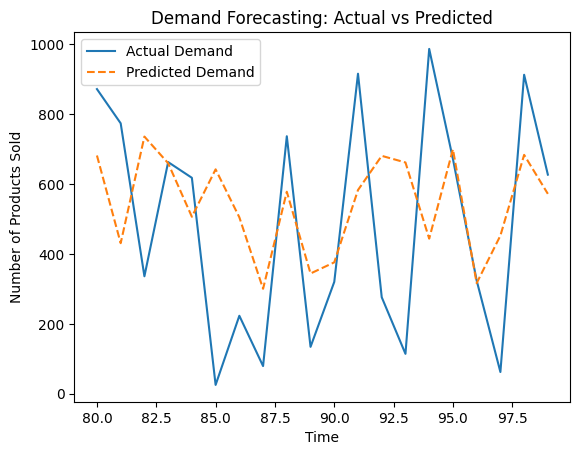

In [244]:
# Demand Forecasting using XGBoost

give_metric(XGBRegressor(objective='reg:squarederror', n_estimators=2000, max_depth=8), X_train, X_test, y_train, y_test)

Mean Absolute Error: 301.57117696546266



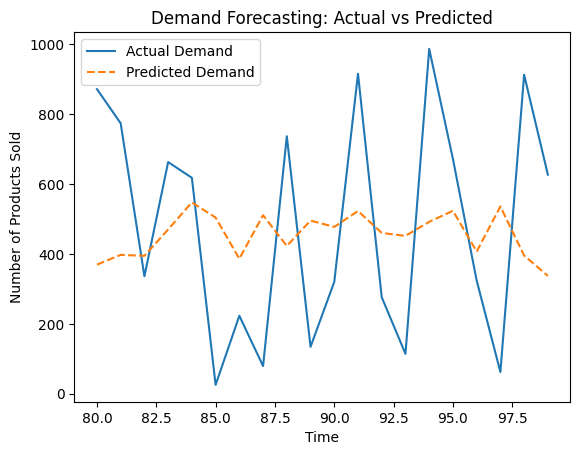

In [245]:
# LR

give_metric(LinearRegression(), X_train, X_test, y_train, y_test)

Mean Absolute Error: 300.9



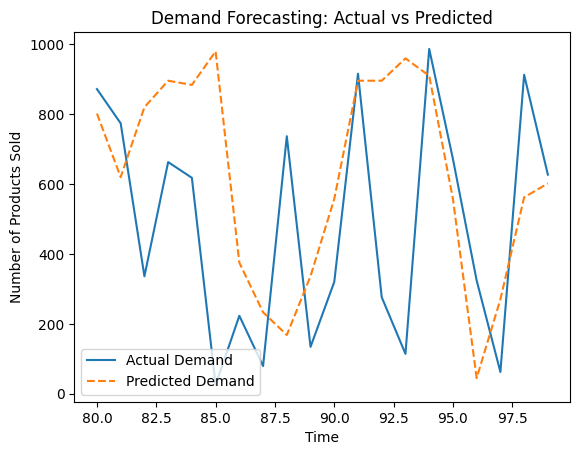

In [246]:
# DTR

give_metric(DecisionTreeRegressor(max_depth=8), X_train, X_test, y_train, y_test)

Mean Absolute Error: 283.3634062728508



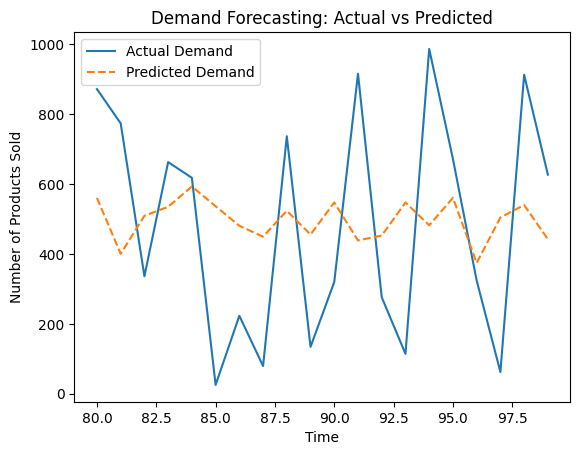

In [247]:
# RFR

give_metric(RandomForestRegressor(n_estimators=100, max_depth=8), X_train, X_test, y_train, y_test)

Mean Absolute Error: 303.9697605748063



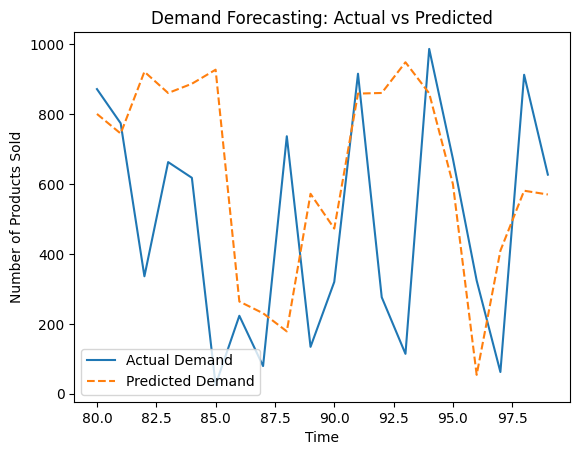

In [248]:
#GB

give_metric(GradientBoostingRegressor(n_estimators=500, max_depth=8), X_train, X_test, y_train, y_test)

In [249]:
final_model = XGBRegressor(objective='reg:squarederror', n_estimators=2000, max_depth=8)

final_model.fit(X_train, y_train)

# Make predictions on the test set
demand_forecasted = final_model.predict(X_test)


# Inventory Optimization using Linear Programming

In [250]:
# Set up the decision variables for how much inventory to order
if 'Stock levels' in data.columns:
    print("Using last available stock levels")
    stock_levels = data['Stock levels'].iloc[-1]  # Use last available stock levels
else:
    print("Using default 0 if stock levels are not available")
    stock_levels = 0  # Default to 0 if stock levels are not available

forecasted_demand = demand_forecasted  # Forecasted demand from final model

# Create decision variables for order quantities for each product
order_vars = pulp.LpVariable.dicts("Order", range(len(forecasted_demand)), lowBound=0, cat='Continuous')

# Define the linear programming problem
prob = pulp.LpProblem("Inventory_Optimization", pulp.LpMinimize)

# Objective: Minimize the total order quantity needed to meet demand
prob += pulp.lpSum(order_vars[i] for i in range(len(forecasted_demand))), "Total Order Quantity"

# Constraints: Order quantity should meet or exceed the forecasted demand (taking into account lead time)
for i in range(len(forecasted_demand)):
    prob += order_vars[i] + stock_levels >= forecasted_demand[i], f"Demand_Constraint_{i}"

# Solve the optimization problem
prob.solve()

# Check solver status
if pulp.LpStatus[prob.status] == "Optimal":
    # Print optimal order quantities
    print("Optimal Order Quantities:")
    for v in prob.variables():
        print(v.name, "=", v.varValue)

    # Print total order quantity
    print("Total Order Quantity:", pulp.value(prob.objective))
else:
    print("Solver did not find an optimal solution.")

Using last available stock levels
Optimal Order Quantities:
Order_0 = 626.85138
Order_1 = 375.80014
Order_10 = 320.95563
Order_11 = 528.04767
Order_12 = 625.8703
Order_13 = 606.89697
Order_14 = 388.78372
Order_15 = 644.65125
Order_16 = 261.44064
Order_17 = 397.49063
Order_18 = 628.64966
Order_19 = 517.07489
Order_2 = 680.99353
Order_3 = 604.77759
Order_4 = 451.45245
Order_5 = 587.23761
Order_6 = 449.89957
Order_7 = 245.2334
Order_8 = 523.08533
Order_9 = 289.05743
Total Order Quantity: 9754.249790000002


# Defect Prediction & Supplier Performance Evaluation

In [192]:
# Fill missing values if needed (example: fill with the mean for numeric columns)
data['Defect rates'] = data['Defect rates'].fillna(data['Defect rates'].mean())  # Avoid using inplace=True

# Feature Engineering: Prepare features for the defect prediction model
features = ['Price', 'Stock levels', 'Lead times', 'Order quantities', 'Shipping times', 'Shipping costs',
            'Production volumes', 'Manufacturing lead time', 'Manufacturing costs', 'Transportation modes']

# Check if 'Transportation modes' exists and handle it if necessary
if 'Transportation modes' not in data.columns:
    features.remove('Transportation modes')

# Define the features and target
X = data[features]
y = data['Defect rates']

# Convert categorical features into numeric (if any)
X = pd.get_dummies(X, drop_first=True)  # Convert categorical features into dummy variables if needed

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [193]:
# Convert categorical features into numeric (if any)
X = pd.get_dummies(X, drop_first=True)  # Convert categorical features into dummy variables if needed

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [194]:
def get_supplier_performance(model, X_train_scaled, X_test_scaled, y_train, y_test ):
  # Train a linear regression model

  model.fit(X_train_scaled, y_train)

  # Make predictions
  y_pred = model.predict(X_test_scaled)

  # # Evaluate the model
  # mse = mean_squared_error(y_test, y_pred)
  # r2 = r2_score(y_test, y_pred)
  # print(f"Mean Squared Error: {mse}")
  # print(f"Model R²: {r2}")

  data_copy = data.copy()
  # Add predicted defect rates to the dataset
  data_copy['Predicted Defect Rates'] = model.predict(scaler.transform(X))

  # Evaluate Supplier Performance based on Predicted Defect Rates
  supplier_performance = data_copy.groupby('Supplier name').agg(
      predicted_defect_rate=('Predicted Defect Rates', 'mean'),
      actual_defect_rate=('Defect rates', 'mean')
  ).reset_index()

  # Display Supplier Performance Evaluation
  print(supplier_performance)

  print()

  print(f"actual_defect_rate and predicted_defect_rate R²: {r2_score(supplier_performance['actual_defect_rate'],supplier_performance['predicted_defect_rate'])}")

  plt.figure(figsize=(10, 6))

  # Melt the data to make it suitable for seaborn
  supplier_performance_melted = supplier_performance.melt(id_vars="Supplier name",
                                                          value_vars=["predicted_defect_rate", "actual_defect_rate"],
                                                          var_name="Defect Type", value_name="Defect Rate")

  # Create the bar plot
  sns.barplot(x="Supplier name", y="Defect Rate", hue="Defect Type", data=supplier_performance_melted)

  # Customize the plot
  plt.title('Comparison of Predicted vs Actual Defect Rates by Supplier')
  plt.xlabel('Supplier Name')
  plt.ylabel('Defect Rate')
  plt.xticks(rotation=45)
  plt.tight_layout()

  # Show the plot
  plt.show()




  Supplier name  predicted_defect_rate  actual_defect_rate
0    Supplier 1               2.020077            1.803630
1    Supplier 2               2.412735            2.362750
2    Supplier 3               2.365433            2.465786
3    Supplier 4               2.466410            2.337397
4    Supplier 5               2.354337            2.665408

actual_defect_rate and predicted_defect_rate R²: 0.5775243035981884


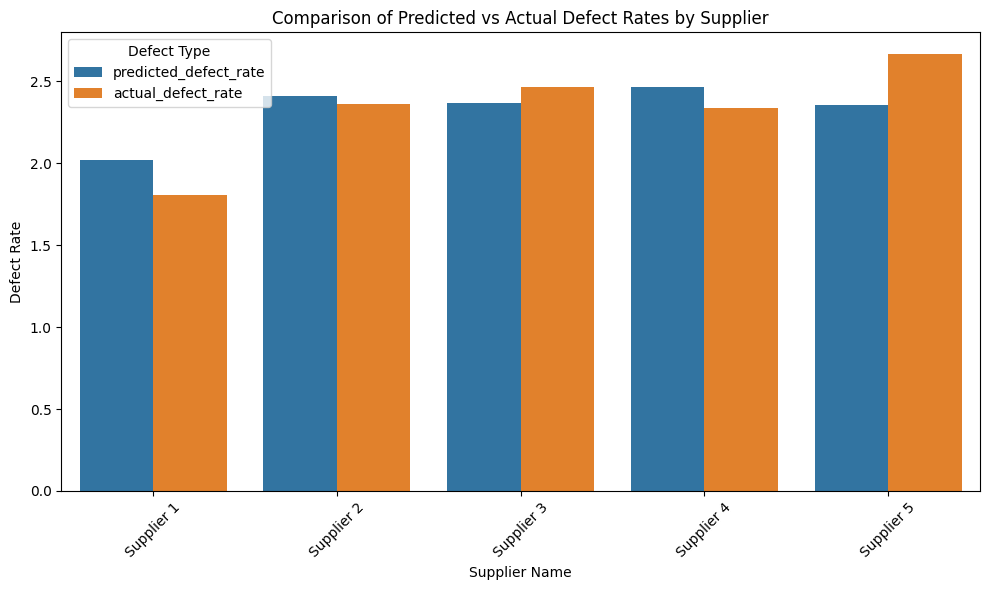

In [195]:
get_supplier_performance(
    LinearRegression(),
    X_train_scaled, X_test_scaled, y_train, y_test
    )

  Supplier name  predicted_defect_rate  actual_defect_rate
0    Supplier 1               1.873489            1.803630
1    Supplier 2               2.308965            2.362750
2    Supplier 3               2.478009            2.465786
3    Supplier 4               2.227089            2.337397
4    Supplier 5               2.671384            2.665408

actual_defect_rate and predicted_defect_rate R²: 0.9508016305386224


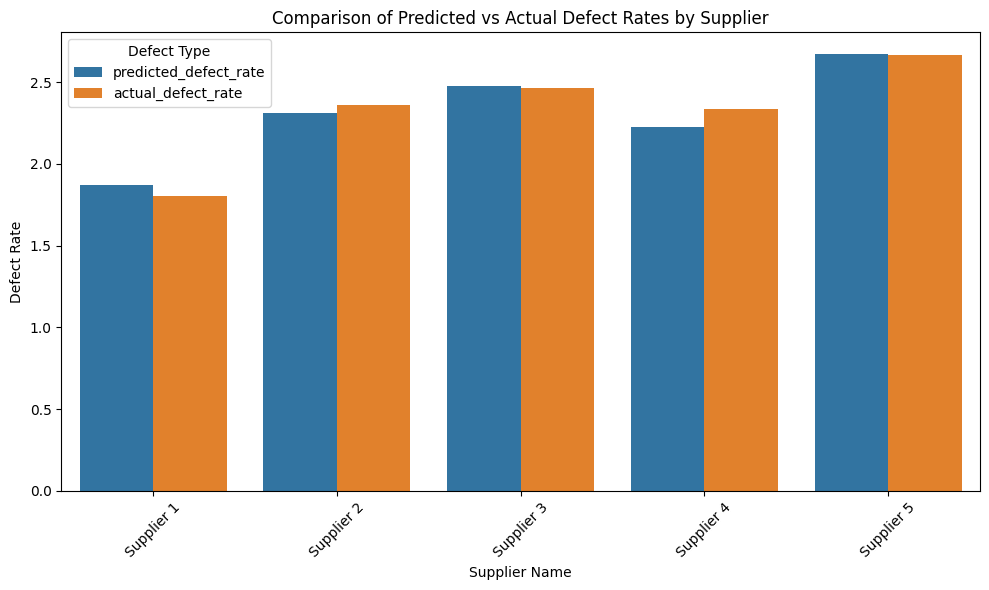

In [196]:
get_supplier_performance(
    XGBRegressor(objective='reg:squarederror', n_estimators=2000, max_depth=8),
    X_train_scaled, X_test_scaled, y_train, y_test
    )

  Supplier name  predicted_defect_rate  actual_defect_rate
0    Supplier 1               1.904591            1.803630
1    Supplier 2               2.549786            2.362750
2    Supplier 3               2.562831            2.465786
3    Supplier 4               2.291293            2.337397
4    Supplier 5               2.630068            2.665408

actual_defect_rate and predicted_defect_rate R²: 0.8582984177358922


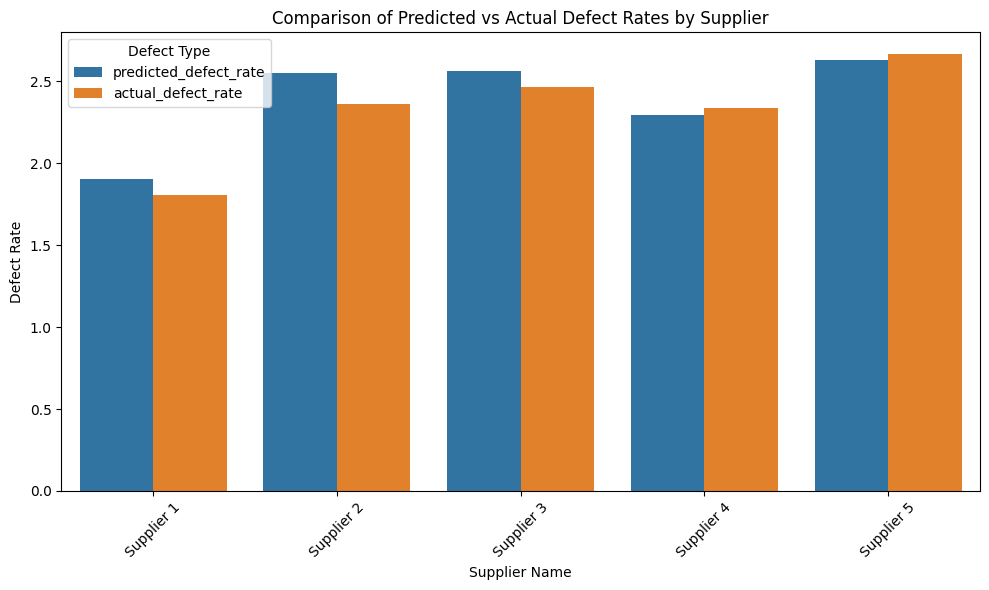

In [197]:
get_supplier_performance(
    DecisionTreeRegressor(max_depth=8),
    X_train_scaled, X_test_scaled, y_train, y_test
    )

  Supplier name  predicted_defect_rate  actual_defect_rate
0    Supplier 1               1.967140            1.803630
1    Supplier 2               2.371849            2.362750
2    Supplier 3               2.415196            2.465786
3    Supplier 4               2.292156            2.337397
4    Supplier 5               2.471451            2.665408

actual_defect_rate and predicted_defect_rate R²: 0.8312225986922139


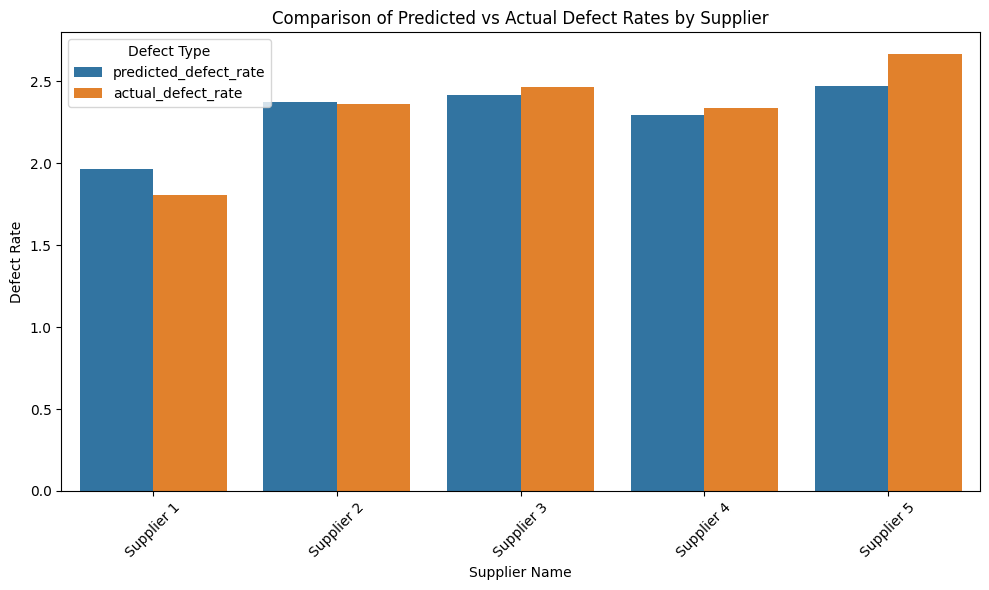

In [198]:
get_supplier_performance(
    RandomForestRegressor(n_estimators=100, max_depth=8),
    X_train_scaled, X_test_scaled, y_train, y_test
    )

  Supplier name  predicted_defect_rate  actual_defect_rate
0    Supplier 1               1.900957            1.803630
1    Supplier 2               2.573714            2.362750
2    Supplier 3               2.690099            2.465786
3    Supplier 4               2.284924            2.337397
4    Supplier 5               2.622145            2.665408

actual_defect_rate and predicted_defect_rate R²: 0.733747598606735


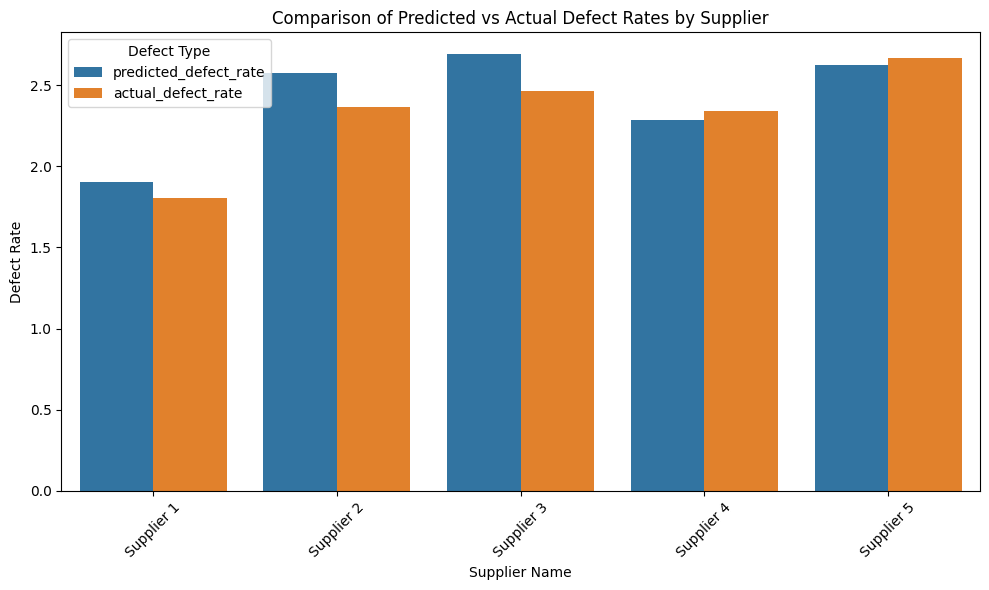

In [199]:
get_supplier_performance(
    GradientBoostingRegressor(n_estimators=500, max_depth=8),
    X_train_scaled, X_test_scaled, y_train, y_test
    )

  Supplier name  predicted_defect_rate  actual_defect_rate
0    Supplier 1               1.860868            1.803630
1    Supplier 2               2.332520            2.362750
2    Supplier 3               2.464094            2.465786
3    Supplier 4               2.235641            2.337397
4    Supplier 5               2.685967            2.665408

actual_defect_rate and predicted_defect_rate R²: 0.963406163298938


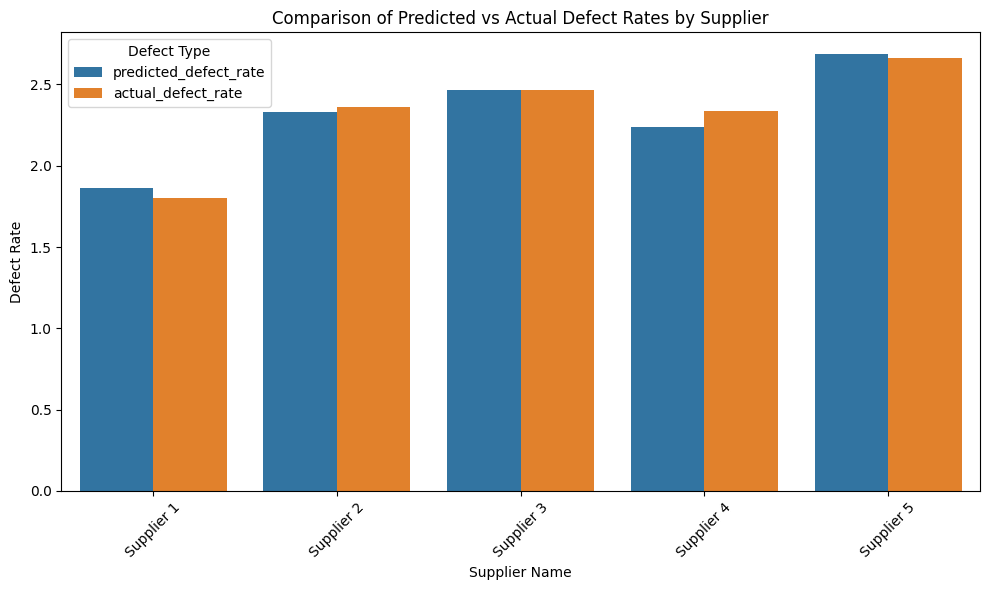

In [200]:
get_supplier_performance(
    XGBRegressor(objective='reg:squarederror', n_estimators=4000, max_depth=10), # BEST MODEL
    X_train_scaled, X_test_scaled, y_train, y_test
    )

## Select optimal suppliers based on cost, defect rate, and lead time.

Objective: Select optimal suppliers based on cost, defect rate, and lead time.

Approach: Use weighted scoring or multi-objective optimization.

In [202]:

# Sample data (replace with actual supplier metrics)
suppliers = data['Supplier name'].unique()
supplier_data = data.groupby('Supplier name').agg({
    'Manufacturing costs': 'mean',
    'Defect rates': 'mean',
    'Lead time': 'mean'
}).reset_index()

# Create LP problem
prob = pulp.LpProblem("Supplier_Selection", pulp.LpMinimize)

# Decision variables (binary: 1 if supplier is selected)
supplier_vars = pulp.LpVariable.dicts("Supplier", suppliers, cat='Binary')

# Weights for objectives (customize based on business priorities)
cost_weight = 0.5
defect_weight = 0.3
leadtime_weight = 0.2

# Objective function: Minimize weighted total cost
prob += pulp.lpSum([
    supplier_vars[s] * (
        cost_weight * supplier_data.loc[supplier_data['Supplier name'] == s, 'Manufacturing costs'].values[0] +
        defect_weight * supplier_data.loc[supplier_data['Supplier name'] == s, 'Defect rates'].values[0] +
        leadtime_weight * supplier_data.loc[supplier_data['Supplier name'] == s, 'Lead time'].values[0]
    ) for s in suppliers
])

# Constraints (e.g., select at least 2 suppliers)
prob += pulp.lpSum(supplier_vars[s] for s in suppliers) >= 2

prob.solve()
print("Selected Suppliers:", [s for s in suppliers if supplier_vars[s].varValue > 0])

Selected Suppliers: ['Supplier 1', 'Supplier 2']


## Transportation Mode Optimization

Objective: Minimize total shipping costs while meeting delivery time constraints and incorporating route efficiency.

Approach

Decision Variables:

Binary choice for transportation mode (Road/Air/Sea) on each route.

Objective Function:

Minimize total cost and maximize route efficiency (weighted hybrid objective).

Constraints:

Each route must use exactly one transportation mode.

Delivery time per route ≤ specified threshold.

In [240]:
import pulp

# Load efficiency scores (from EDA analysis)  https://colab.research.google.com/drive/11QcH2Hc3WyOp0valz9d4gQUXrjWgo1gJ?authuser=2#scrollTo=ieD3WKzraUcO&line=9&uniqifier=1
efficiency_scores = {
    "Route A": 0.088572,
    "Route B": 0.062116,
    "Route C": 0.039962
}

# Group data with corrected costs
route_data = data.groupby(['Routes', 'Transportation modes']).agg({
    'Shipping costs': 'mean',  # Should now reflect values in hundreds
    'Shipping times': 'mean'
}).reset_index()

# Re-run the optimization model
# Create LP problem
prob = pulp.LpProblem("Transport_Mode_Selection", pulp.LpMinimize)
mode_vars = pulp.LpVariable.dicts("TransportMode", route_data.index, cat='Binary')

# Weighting parameter (0 = only cost, 1 = only efficiency; adjust as needed)
alpha = 0.3  # Example: 30% weight to efficiency, 70% to cost

# Objective: Hybrid of minimizing cost and maximizing efficiency
prob += (
    (1 - alpha) * pulp.lpSum([mode_vars[i] * route_data.loc[i, 'Shipping costs'] for i in route_data.index]) -
    alpha * pulp.lpSum([mode_vars[i] * efficiency_scores[route_data.loc[i, 'Routes']] for i in route_data.index])
), "Hybrid_Cost_Efficiency_Objective"

# Constraint 1: Assign exactly one mode per route
for route in route_data['Routes'].unique():
    prob += (
        pulp.lpSum(mode_vars[i] for i in route_data[route_data['Routes'] == route].index) == 1,
        f"Route_{route}_Assignment"
    )

# Constraint 2: Max shipping time per route (e.g., ≤7 days)
max_time_per_route = 7
for i in route_data.index:
    prob += (
        mode_vars[i] * route_data.loc[i, 'Shipping times'] <= max_time_per_route,
        f"Max_Time_{route_data.loc[i, 'Routes']}_{i}"
    )

# Solve
prob.solve()

# Print results
if pulp.LpStatus[prob.status] == "Optimal":
    print("Optimal Solution Found:")
    total_cost = 0
    total_efficiency = 0
    for i in route_data.index:
        if mode_vars[i].varValue > 0:
            route = route_data.loc[i, 'Routes']
            mode = route_data.loc[i, 'Transportation modes']
            cost = route_data.loc[i, 'Shipping costs']
            time = route_data.loc[i, 'Shipping times']
            efficiency = efficiency_scores[route]
            print(f"Route {route} ➜ {mode} (Shipping Cost: ${cost:.2f}, Time: {time} days, Efficiency: {efficiency:.4f})")
            total_cost += cost
            total_efficiency += efficiency
    print(f"\nTotal Shipping Cost: ${total_cost:.2f}")
    print(f"Total Efficiency Score: {total_efficiency:.4f}")
else:
    print(f"No solution. Status: {pulp.LpStatus[prob.status]}")

Optimal Solution Found:
Route Route A ➜ Rail (Shipping Cost: $4.67, Time: 6.357142857142857 days, Efficiency: 0.0886)
Route Route B ➜ Sea (Shipping Cost: $4.61, Time: 6.5 days, Efficiency: 0.0621)
Route Route C ➜ Air (Shipping Cost: $5.25, Time: 4.75 days, Efficiency: 0.0400)

Total Shipping Cost: $14.52
Total Efficiency Score: 0.1906


# Dynamic Pricing

In [219]:
from sklearn.ensemble import RandomForestRegressor

# Train model to predict revenue based on price and customer demographics
X = data[['Price', 'Customer demographics', 'Availability']]
X['Customer demographics'] = LabelEncoder().fit_transform(X['Customer demographics'])
y = data['Revenue generated']

model = RandomForestRegressor()
model.fit(X, y)

<ipython-input-219-1c62ea8990ee>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



RandomForestRegressor()

In [220]:
# Grid search for optimal price
price_range = np.linspace(data['Price'].min(), data['Price'].max(), 100)
simulated_data = pd.DataFrame({
    'Price': price_range,
    'Customer demographics': X['Customer demographics'].mode()[0],  # Most common segment
    'Availability': 100 # Assume high availability
})

simulated_data['Predicted_Revenue'] = model.predict(simulated_data)
optimal_price = simulated_data.loc[simulated_data['Predicted_Revenue'].idxmax(), 'Price']
print(f"Optimal Price: ${optimal_price:.2f}")

Optimal Price: $2.68


In [221]:
# Grid search for optimal price
price_range = np.linspace(data['Price'].min(), data['Price'].max(), 100)
simulated_data = pd.DataFrame({
    'Price': price_range,
    'Customer demographics': X['Customer demographics'].mode()[0],  # Most common segment
    'Availability': 20 # Assume Low availability
})

simulated_data['Predicted_Revenue'] = model.predict(simulated_data)
optimal_price = simulated_data.loc[simulated_data['Predicted_Revenue'].idxmax(), 'Price']
print(f"Optimal Price: ${optimal_price:.2f}")

Optimal Price: $88.34
